In [1]:
%load_ext autoreload
%autoreload 2

from bethe_block import *
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

In [4]:
ke = np.linspace(.1, 100, 100)
pstar_data = np.genfromtxt('pstar_27Al.dat', skip_header=8)
wiki_data = np.array([[.3, 100],[60, 2]])
bse = bethe_bloch(ke, Z=13, A=27, rho=2.7) / 10  # in MeV/mm
sp = stopping_power(ke, Z=13, A=27, rho=2.7)

Text(0.5, 0.98, 'Aluminium stopping power for protons')

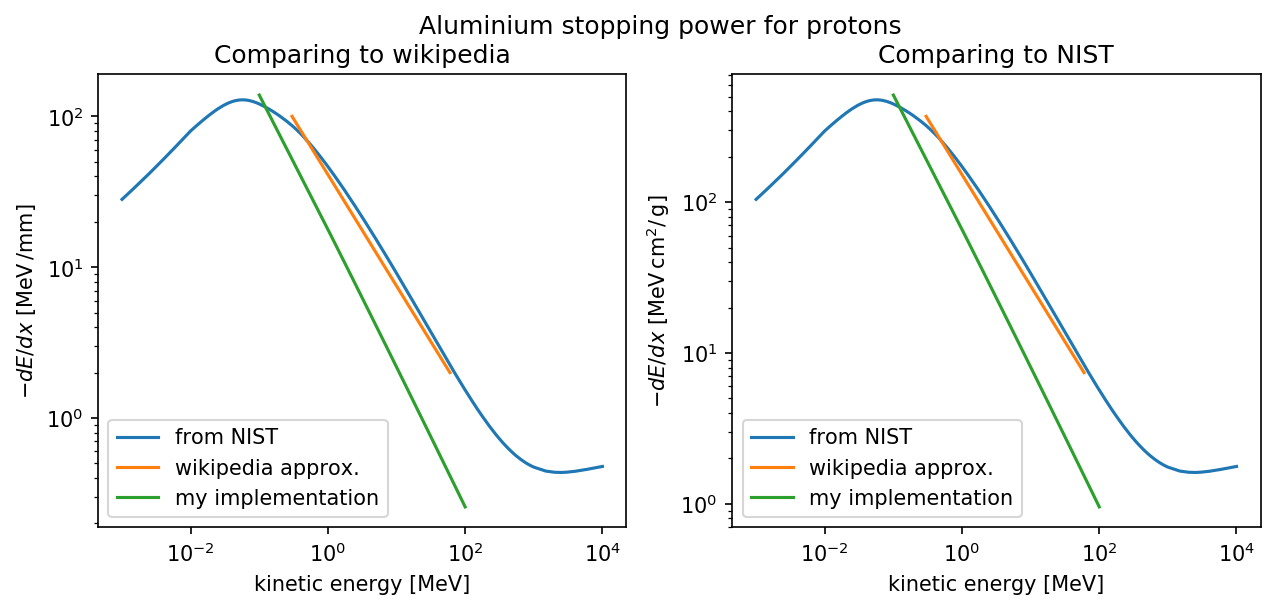

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
# for beryllium


plt.sca(ax1)
rho = 2.7
plt.plot(pstar_data[:, 0], pstar_data[:, -1] * rho / 10, label='from NIST')
plt.plot(wiki_data[:, 0], wiki_data[:, 1], label='wikipedia approx.')
plt.plot(ke, bse, label='my implementation')

plt.loglog()
plt.xlabel('kinetic energy [MeV]')
plt.ylabel(r'$-dE/dx$ $\rm [MeV\,/mm]$')
plt.title('Comparing to wikipedia')
plt.legend()

plt.sca(ax2)

plt.plot(pstar_data[:, 0], pstar_data[:, -1], label='from NIST')
plt.plot(wiki_data[:, 0], wiki_data[:, 1]*10/2.7, label='wikipedia approx.')
plt.plot(ke, sp, label='my implementation')

plt.loglog()
plt.xlabel('kinetic energy [MeV]')
plt.ylabel(r'$-dE/dx$ $\rm [MeV\,cm^2/\,g ]$')
plt.title('Comparing to NIST')
plt.legend()

f.suptitle('Aluminium stopping power for protons')

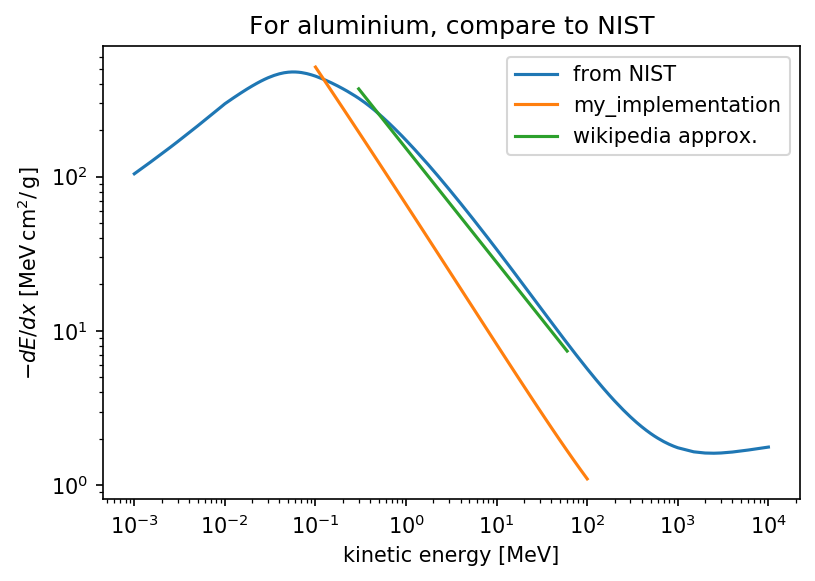

In [43]:
plt.subplots(dpi=150)

ke = np.logspace(-1, 2, 40)

plt.plot(pstar_data[:, 0], pstar_data[:, -1], label='from NIST')

sp = stopping_power(ke, Z=13, A=27, rho=2.7)
plt.plot(ke, sp, label='my_implementation')

plt.plot(wiki_data[:, 0], wiki_data[:, 1]*10/2.7, label='wikipedia approx.')

plt.loglog()
plt.xlabel('kinetic energy [MeV]')
plt.ylabel(r'$-dE/dx$ $\rm [MeV\,cm^2/\,g ]$')
plt.title('For aluminium, compare to NIST')
plt.legend()

In [38]:
def range(Eo, **kwargs):
    """calculates the range of a proton of energy Eo
    in a  material. Uses the bethe-bloch formula
    """
    
    E = np.linspace(Eo/1e6, Eo, 100)
    SP = bethe_bloch(E, **kwargs)
    
    return E[1:], cumtrapz(SP, E)

3.01e+11 3e-05 1.44e-09 13.00721506242718


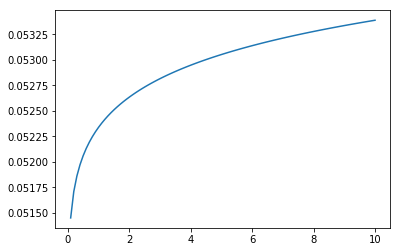

In [39]:
plt.plot(*range(10))

In [27]:
cumtrapz?

Signature: cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)
Docstring:
Cumulatively integrate y(x) using the composite trapezoidal rule.

Parameters
----------
y : array_like
    Values to integrate.
x : array_like, optional
    The coordinate to integrate along.  If None (default), use spacing `dx`
    between consecutive elements in `y`.
dx : float, optional
    Spacing between elements of `y`.  Only used if `x` is None.
axis : int, optional
    Specifies the axis to cumulate.  Default is -1 (last axis).
initial : scalar, optional
    If given, insert this value at the beginning of the returned result.
    Typically this value should be 0.  Default is None, which means no
    value at ``x[0]`` is returned and `res` has one element less than `y`
    along the axis of integration.

Returns
-------
res : ndarray
    The result of cumulative integration of `y` along `axis`.
    If `initial` is None, the shape is such that the axis of integration
    has one less value than `y`.  If `in

In [96]:
np.log(2.71828)

0.999999327347282